# Mini-Project: Pima Indians Diabetes Dataset
Source link of the dataset on kaggle: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

#### Context:
    This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritag.

#### import the required packages

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

#### Import the dataset

In [3]:
diabetes = pd.read_csv("diabetes.csv")

## 1. Give a short overview of the dataset

In [4]:
#returns the dimensions of the dataset (number of rows, number of columns)
diabetes.shape

(768, 9)

In [5]:
#returns the first 10 rows in the databest.
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
#describe(include="all") function get a summary of all the columns when the dataframe has mixed column types
diabetes.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#get the column labels of the Dataset
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#function is used to get a concise summary of the dataset
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [9]:
#nunique() method returns the number of unique values for each column.
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## 2. Perform the basic procedures of data preparation, cleaning, and EDA 

In [10]:
#get the total number of duplicated rows.
sum(diabetes.duplicated())

0

In [11]:
#returns the lowest age value
diabetes["Age"].min()

21

In [12]:
#returns the highest age value
diabetes["Age"].max()

81

In [13]:
#returns the lowest BloodPressure value
diabetes["BloodPressure"].min()

0

In [14]:
#returns the highest BloodPressure value
diabetes["BloodPressure"].max()

122

In [15]:
#returns the total number of null values
#it shows 0 null values in the dataset
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

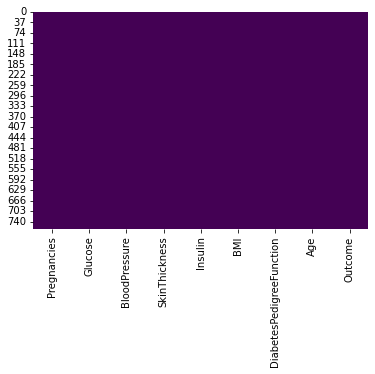

In [16]:
#visualizing null values:
sns.heatmap(diabetes.isnull(),cbar=False,cmap='viridis')

In [17]:
#this piece of code is used to know what are the values in each column and check if there is inconsistency in the values.
for col in diabetes:
    print(col)
    print(diabetes[col].unique())
    print('\n')

Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]


SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 4

In [18]:
#information about the distribution of the target value (outcome)
outcome =diabetes['Outcome'].value_counts()
print(outcome , "\n")

#The percentage for having diabete
have = outcome[1]/ outcome.sum() * 100
print("Percentage of having diabete:",have )

#The percentage for not having diabete
not_have = outcome[0]/ outcome.sum() * 100
print("Percentage of not having diabete:",not_have)

0    500
1    268
Name: Outcome, dtype: int64 

Percentage of having diabete: 34.89583333333333
Percentage of not having diabete: 65.10416666666666


In [19]:
#Get a summary information about the people with diabetes (our target value)
diabetes[diabetes.Outcome == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [20]:
#Get a summary information about the people with not have diabetes (our target value)
diabetes[diabetes.Outcome == 0].describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [21]:
# replace 0 value into NaN before using fillna()
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# replace NaN into mean value for variables with Normal Distribution 
# median value for variables with Skewed Distribution
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True) #normal dist
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace = True) #normal dist
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace = True) #skewed dist
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace = True) #skewed dist
diabetes['BMI'].fillna(diabetes['BMI'].mean(), inplace = True) #normal dist

# check for NaN value after treatment
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 3. Perform all the necessary feature engineering tasks to prepare the dataset.

since all the varibles are numerical we dont need to perform any feature engineering tasks

## 4. Explore the relationship and correlations between variables

<AxesSubplot:xlabel='Outcome', ylabel='count'>

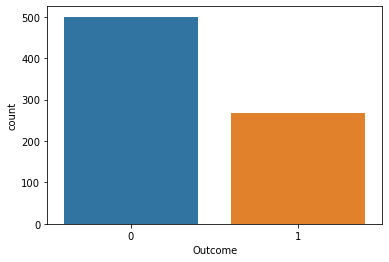

In [22]:
#plot the class label (outcome) and it shows impalnced result.
sns.countplot(x='Outcome', data=diabetes,order=diabetes['Outcome'].value_counts().index)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

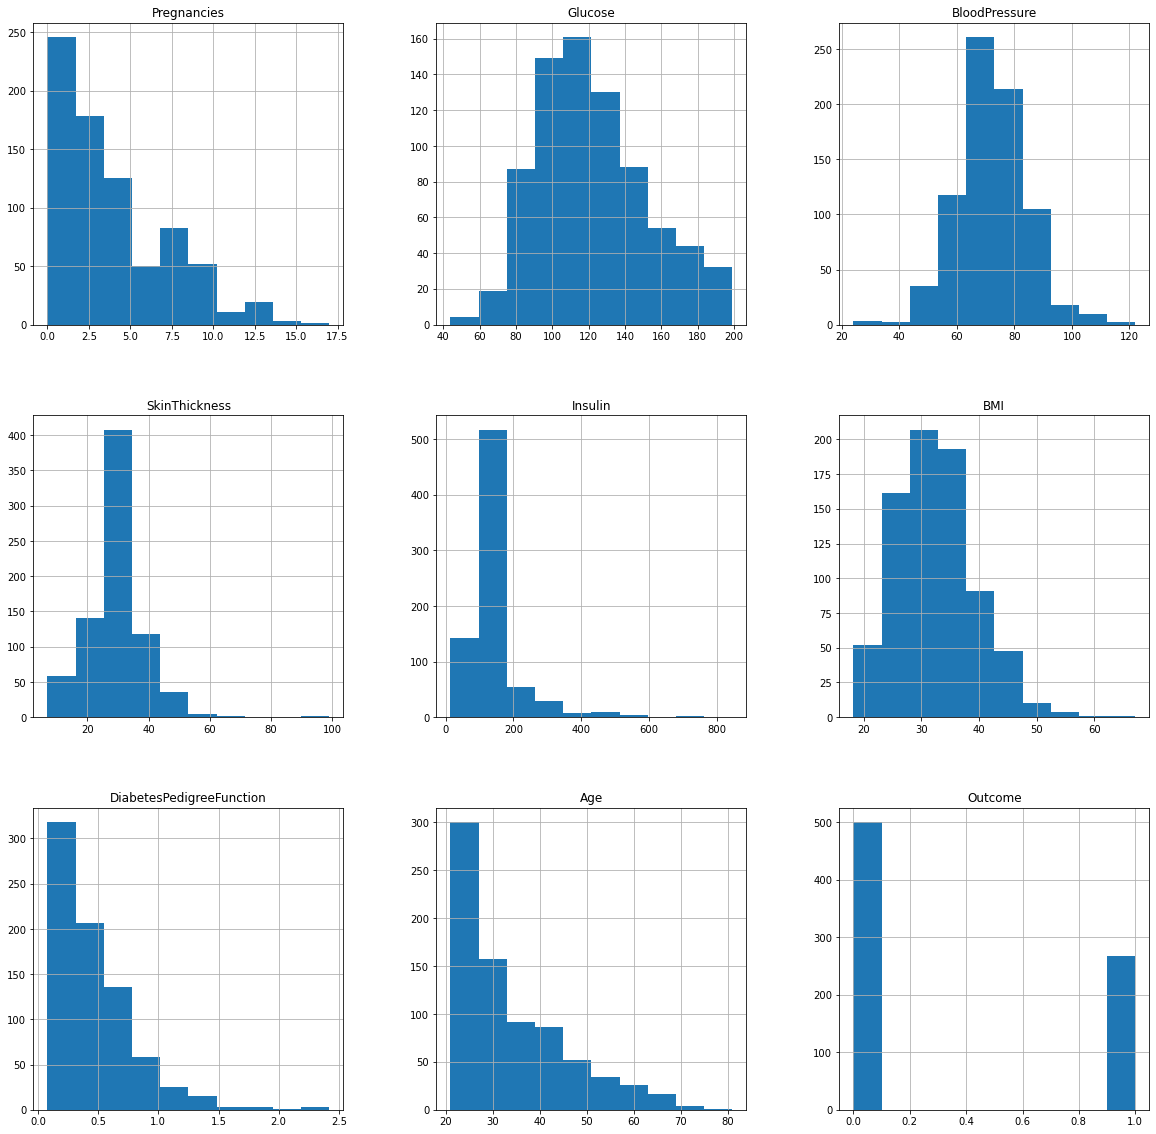

In [23]:
#Plot the histogram of all columns in the dataset
diabetes.hist(figsize = (20,20))

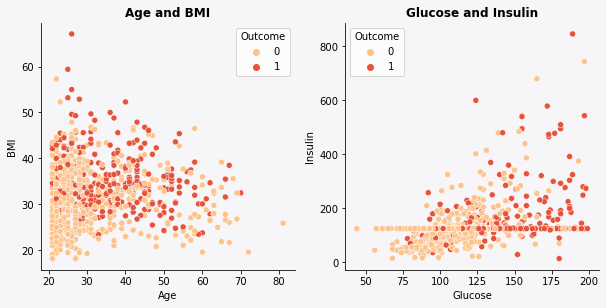

In [24]:
#Bivariate analysis for numerical variables
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
data_categorical=diabetes
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
# Age and bmi

sns.scatterplot(ax=ax0,x=diabetes['Age'],y=diabetes['BMI'],hue=diabetes['Outcome'],palette="OrRd")
ax0.set_title('Age and BMI',fontweight='bold')

# Insulin and Glucose
sns.scatterplot(ax=ax1,x=diabetes['Glucose'],y=diabetes['Insulin'],hue=diabetes['Outcome'],palette="OrRd")
ax1.set_title('Glucose and Insulin',fontweight='bold')

#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)

C:\Users\hutoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hutoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


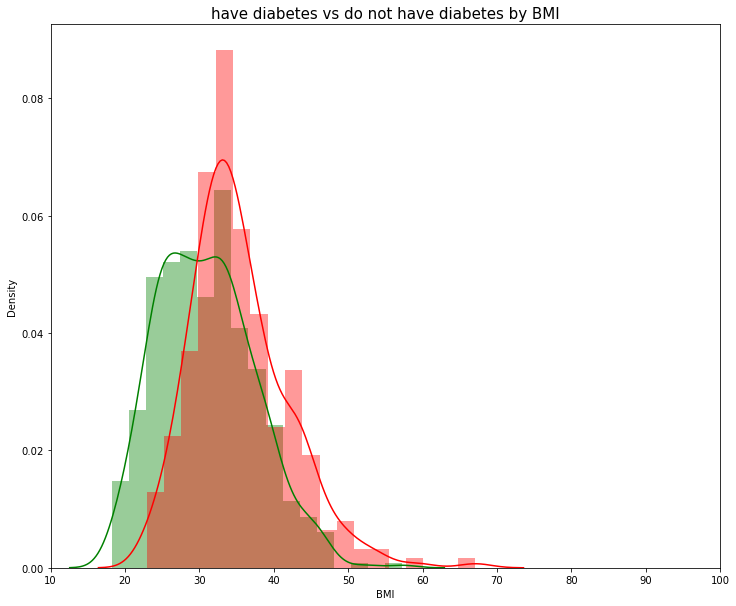

In [25]:
#plot distrepution
#haveing diabetes vs not haveing diabetes
plt.figure(figsize=(12,10))

sns.distplot(diabetes[diabetes['Outcome'] == 0]["BMI"], color='green') # not haveing diabetes - green
sns.distplot(diabetes[diabetes['Outcome'] == 1]["BMI"], color='red') # haveing diabetes - Red

plt.title('have diabetes vs do not have diabetes by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

<AxesSubplot:>

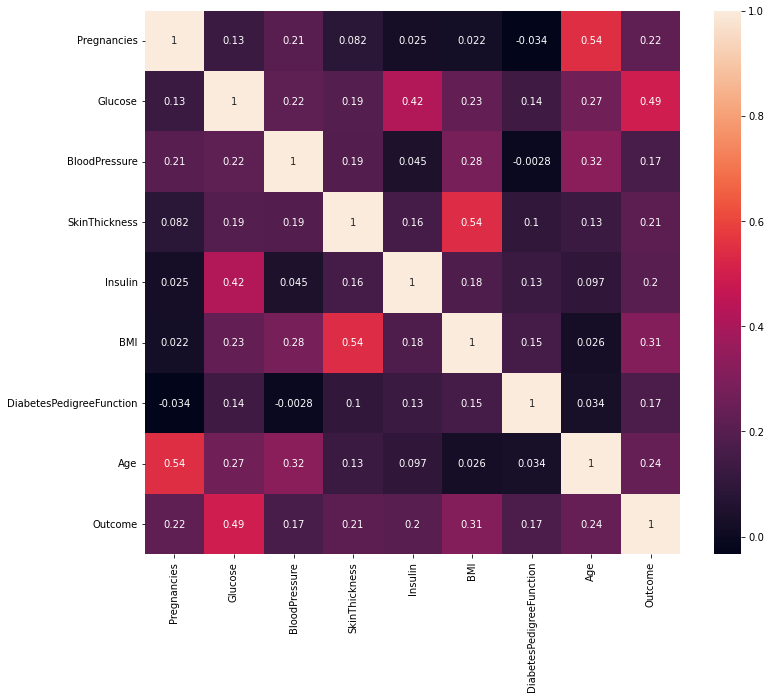

In [26]:
#we used the heatmap to know the strongest positive relationship and the strongest negative relationship
plt.figure(figsize=(12,10)) 
sns.heatmap(diabetes.corr(), annot=True)

Glucose has the strongest correlation with the target variable

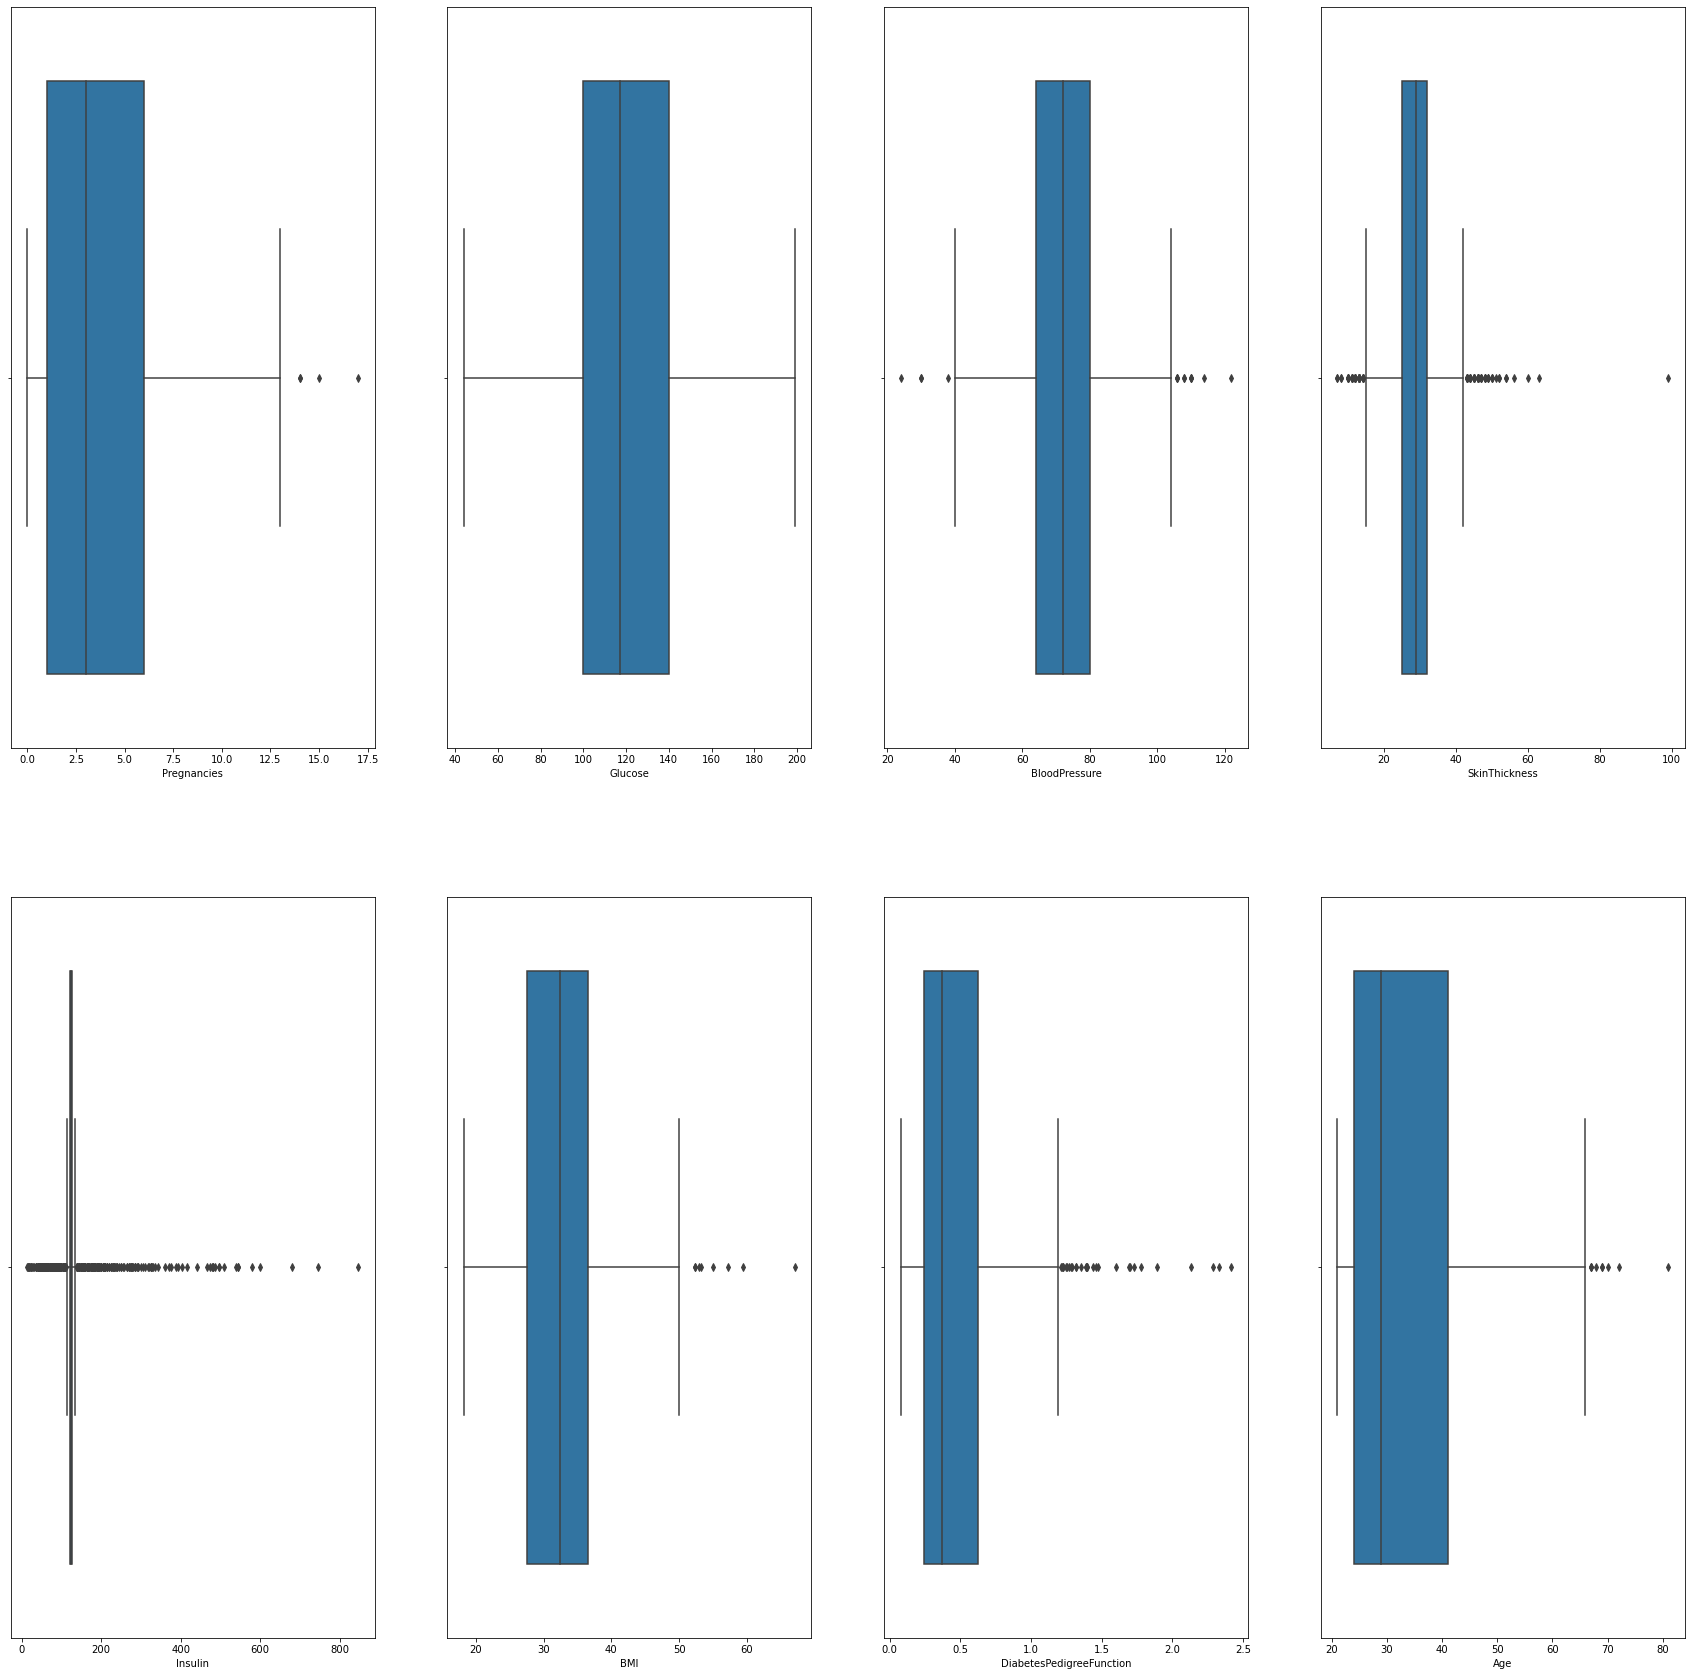

In [27]:
#we used box plot to show distributions and range of numeric data values and to know if there is any ouliers
def boxes_plot(diabetes):
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age'] 
    plt.figure(figsize=(30,30))
    for i in range(len(columns)):
        plt.subplot(2, 4, i+1)
        sns.boxplot(x=columns[i], data=diabetes)
    plt.show()
    
boxes_plot(diabetes)

<AxesSubplot:ylabel='Outcome'>

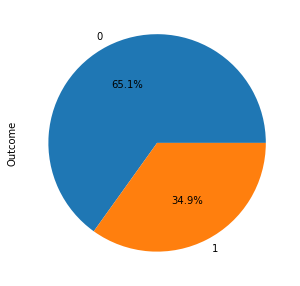

In [28]:
#plot the target variable
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
diabetes['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')

In [29]:
#know the mean value of each column in the dataset
diabetes.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.108073
Insulin                     140.671875
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

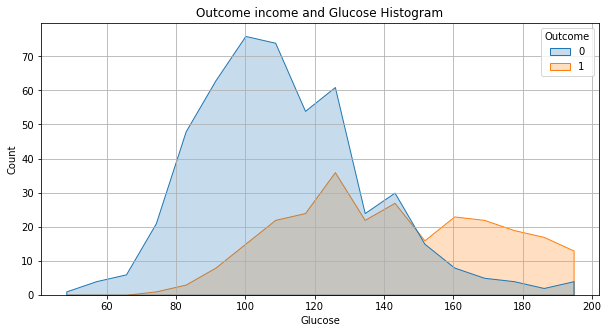

In [30]:
#histogram of Glucose and outcome
plt.figure(figsize=(10,5))
sns.histplot(x="Glucose",hue="Outcome" ,data=diabetes ,element="poly")
plt.title("Outcome income and Glucose Histogram")
plt.grid()


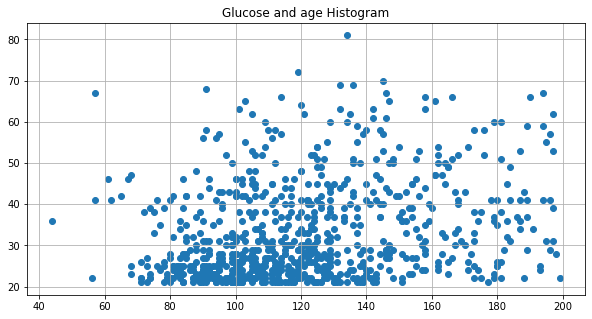

In [31]:
#scatter plot of Glucose and Age
plt.figure(figsize=(10,5))
plt.scatter(x="Glucose",y="Age" ,data=diabetes)
plt.title("Glucose and age Histogram")
plt.grid()

<Figure size 576x576 with 0 Axes>

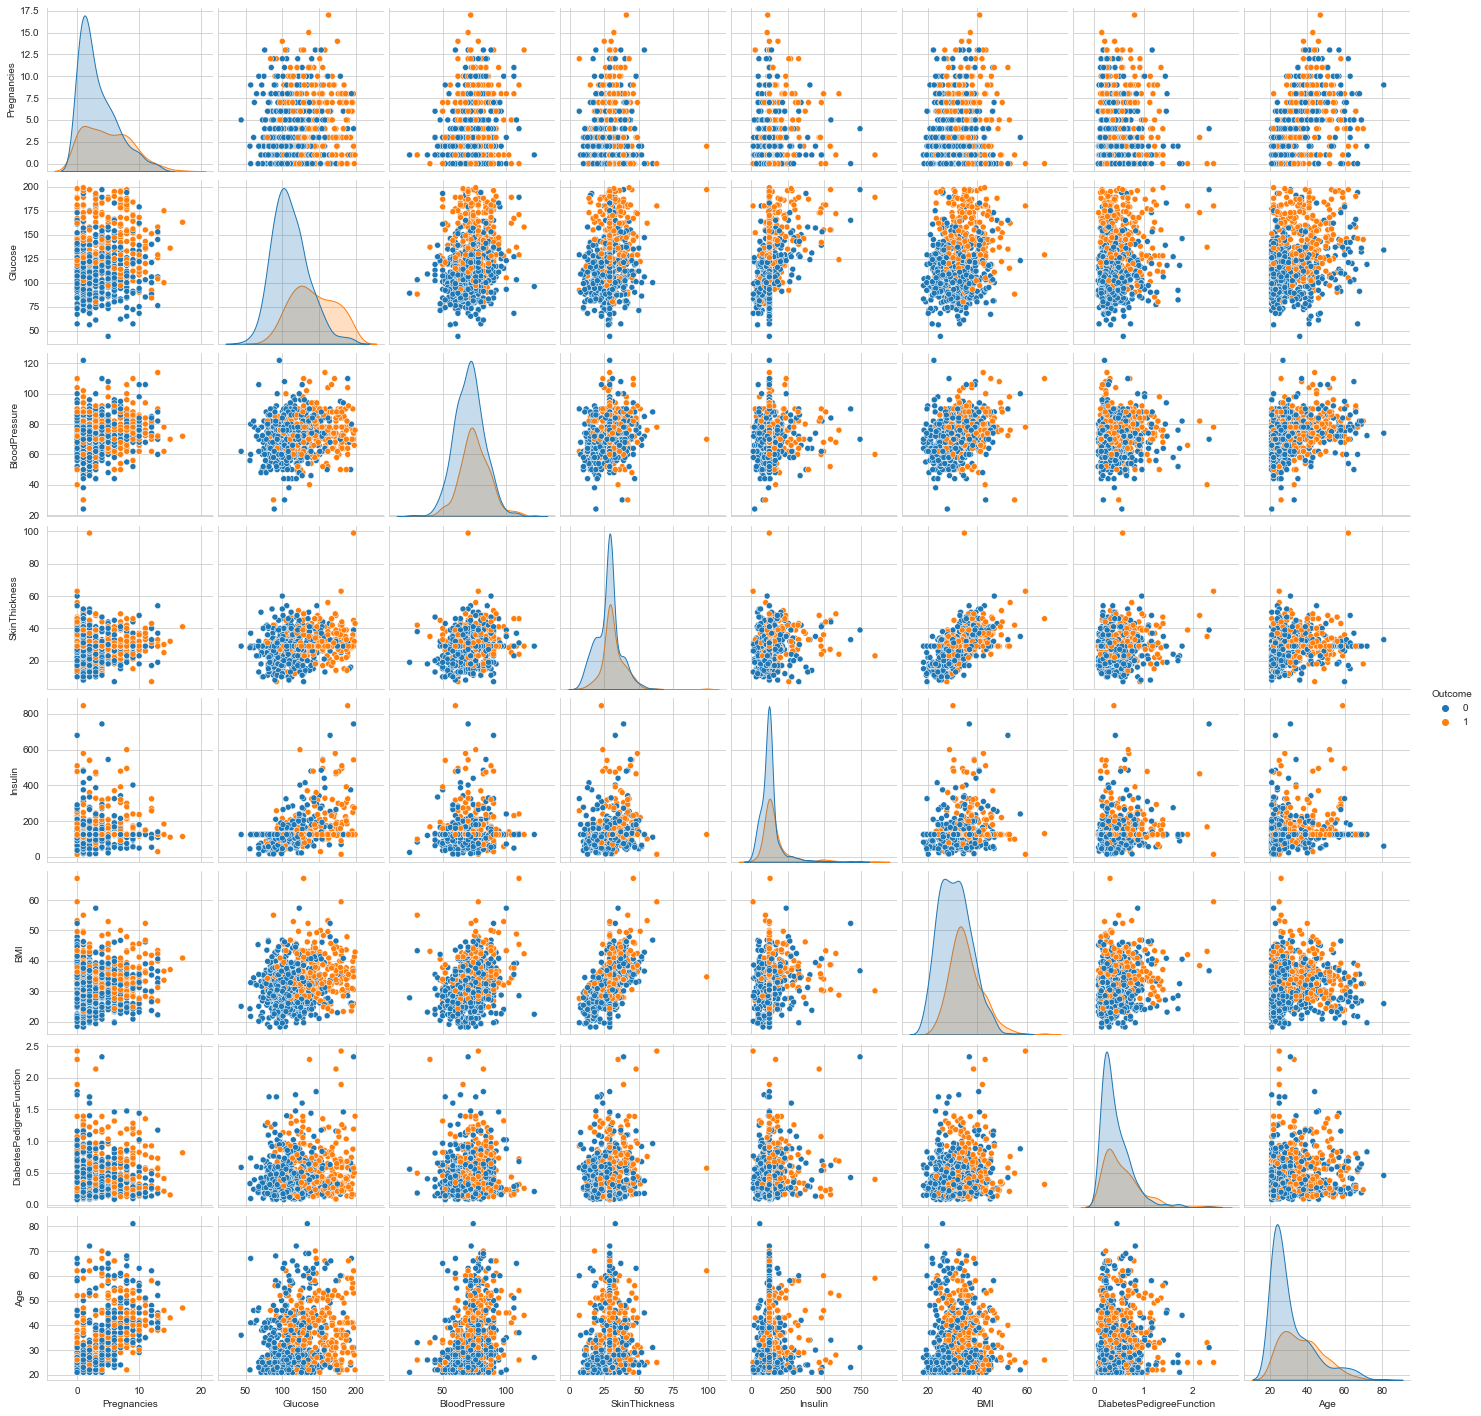

In [32]:
#Plot pairwise relationships in a dataset.
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
sns.pairplot(diabetes,hue='Outcome');
plt.show()

## 5. Apply different classification models such as logistic regression, KNN, and SVM.

In [33]:
X = diabetes.drop('Outcome',axis=1)
y = diabetes['Outcome']

In [34]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

X_train:  (614, 8)
y_train:  (614,)
X_test:  (154, 8)
y_test:  (154,)


### First method:  Logistic Regression

In [35]:
#apply the model (do object from the library)
logReg=LogisticRegression(solver='lbfgs',max_iter=1200000) 
#train the model by inter the train set to fit function
logReg.fit(X_train,y_train)

LogisticRegression(max_iter=1200000)

In [36]:
#Make the prediction
pred_log=logReg.predict(X_test)
pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

#### evaluate the model using the metrics.

In [37]:
acc_log=accuracy_score(y_test,pred_log) # acurecy for test
print("Prediction Accuracy TEST for logistic regression: ",acc_log)
accRL = round(accuracy_score(y_test,pred_log) * 100, 2)
print("Prediction Accuracy TEST after round: ",accRL)

Prediction Accuracy TEST for logistic regression:  0.7532467532467533
Prediction Accuracy TEST after round:  75.32


In [38]:
accLGT=logReg.score(X_train,y_train) # acurecy for train
print("Prediction Accuracy TRAIN for logistic regression: ",accLGT)
accRLT = round(logReg.score(X_train,y_train) * 100, 2)
print("Prediction Accuracy TRAIN after round: ",accRLT)

Prediction Accuracy TRAIN for logistic regression:  0.7703583061889251
Prediction Accuracy TRAIN after round:  77.04


In [39]:
conf_met=metrics.confusion_matrix(y_test,pred_log)
print(conf_met)

[[82 17]
 [21 34]]


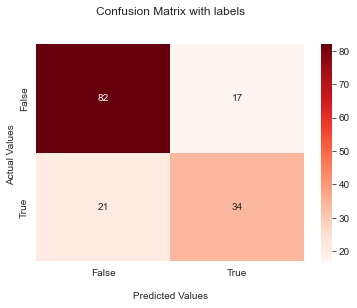

In [40]:
ax = sns.heatmap(conf_met, annot=True, cmap='Reds')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Second method: SVM

In [41]:
#apply the model (do object from the library)
svc=SVC() 
#train the model by inter the train set to fit function
svc.fit(X_train,y_train)

SVC()

In [42]:
#Make the prediction
pred_sv=svc.predict(X_test) 
pred_sv

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

#### evaluate the model using the metrics.

In [43]:
acc_svc=accuracy_score(y_test,pred_sv) # acurecy for test
print("Prediction Accuracy TEST for SVC: ",acc_svc)
accCV= round(accuracy_score(y_test,pred_sv) * 100, 2)
print("Prediction Accuracy TEST after round: ",accCV)

Prediction Accuracy TEST for SVC:  0.7662337662337663
Prediction Accuracy TEST after round:  76.62


In [44]:
accSVCT=svc.score(X_train,y_train) # acurecy for train
print("Prediction Accuracy TRAIN for SVC: ",accSVCT)
accCVT = round(svc.score(X_train,y_train) * 100, 2)
print("Prediction Accuracy TRAIN after round: ",accCVT)

Prediction Accuracy TRAIN for SVC:  0.7687296416938111
Prediction Accuracy TRAIN after round:  76.87


In [45]:
conf_mett=metrics.confusion_matrix(y_test,pred_sv)
print(conf_mett)

[[87 12]
 [24 31]]


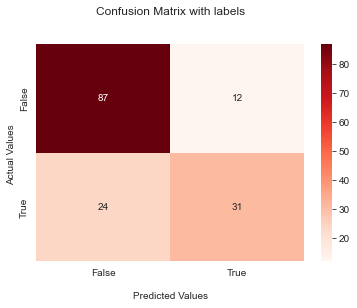

In [46]:
ax = sns.heatmap(conf_mett, annot=True, cmap='Reds')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### third method: KNN

In [47]:
#CHOOSE suitable K with ellbow
error_rate=[]
#try
for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

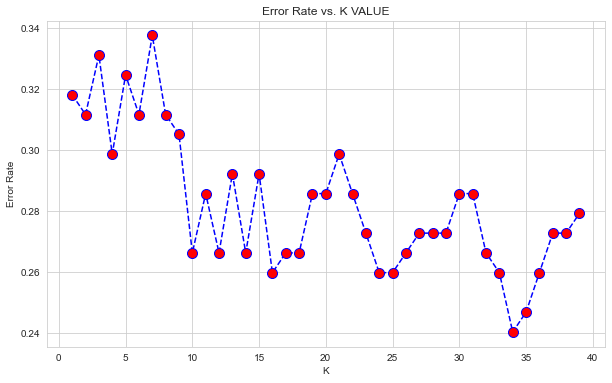

In [48]:
#plot
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K VALUE')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
#apply the model (do object from the library)
knn=KNeighborsClassifier(n_neighbors=10)
#train the model by inter the train set to fit function
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [50]:
#Make the prediction
pred_knn=knn.predict(X_test)
pred_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

#### evaluate the model using the metrics.

In [51]:
acc_knn=accuracy_score(y_test,pred_knn) # acurecy for test
print("Prediction Accuracy TEST for KNN: ",acc_knn)
accKNR = round(accuracy_score(y_test,pred_knn) * 100, 2)
print("Prediction Accuracy TEST after round: ",accKNR)

Prediction Accuracy TEST for KNN:  0.7337662337662337
Prediction Accuracy TEST after round:  73.38


In [52]:
accKNRT=knn.score(X_train,y_train) # acurecy for train
print("Prediction Accuracy TRAIN for KNN: ",accKNRT)
accKNRT = round(knn.score(X_train,y_train) * 100, 2)
print("Prediction Accuracy TRAIN after round: ",accKNRT)

Prediction Accuracy TRAIN for KNN:  0.7882736156351792
Prediction Accuracy TRAIN after round:  78.83


In [53]:
conf_mettt=metrics.confusion_matrix(y_test,pred_knn)
print(conf_mettt)

[[80 19]
 [22 33]]


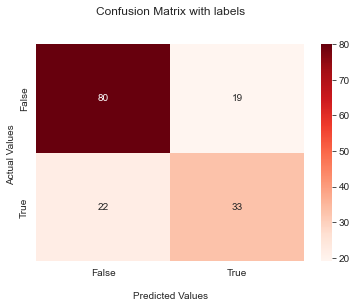

In [54]:
ax = sns.heatmap(conf_mettt, annot=True, cmap='Reds')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

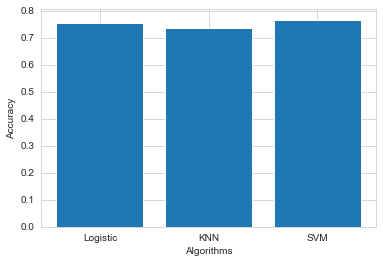

In [55]:
plt.bar(['Logistic','KNN','SVM'],[acc_log,acc_knn,acc_svc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

## 6. Experiment with different parameters in SVM (Parameter tuning for SVC)

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)

print ("Best parameters: ")
print (grid.best_params_) #Best values 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.699 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.634 total time=   0.0s
[CV 4/5] END ....C=1000, gam

In [57]:
grid_predictions = grid.predict(X_test)
print("Prediction Accuracy: ",
      round(metrics.accuracy_score(grid_predictions, y_test)* 100, 2))

Prediction Accuracy:  72.73


In [58]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)

print ("Best parameters: ")
print (grid.best_params_) #Best values 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.659 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.656 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.659 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.656 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.659 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid

[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.656 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.659 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 4/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 5/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.656 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.659 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 4/5] END C=1000, gamma=0

In [59]:
grid_predictions2 = grid.predict(X_test)
print("Prediction Accuracy: ",
      round(metrics.accuracy_score(grid_predictions2, y_test)* 100, 2))

Prediction Accuracy:  64.29
